In [91]:
import pandas as pd
import string

#for machine learning - classification
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#for NLP
from nltk.stem import WordNetLemmatizer 
from nltk import word_tokenize
from nltk.corpus import stopwords

In [92]:
df1 = pd.read_csv('Youtube01-Psy.csv')
df2 = pd.read_csv('Youtube02-KatyPerry.csv')
df3 = pd.read_csv('Youtube03-LMFAO.csv')
df4 = pd.read_csv('Youtube04-Eminem.csv')
df5 = pd.read_csv('Youtube05-Shakira.csv')

df = pd.concat([df1,df2,df3,df4,df5])
df = df[['CONTENT', 'CLASS']].copy()
df.CLASS.value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

In [79]:
df.sample(5)

,CONTENT,CLASS
215,She is perfect,0
303,Check out this playlist on YouTube:﻿,1
140,Check out this video on YouTube:<br />Gotta da...,1
256,check out our bands page on youtube killtheclo...,1
349,want a sub? tell me about your channel and i w...,1


In [80]:
phrase = 'J\'ai BEAUCOUP mangé!'
phrase.lower()

"j'ai beaucoup mangé!"

In [5]:
print(word_tokenize('I would like an orange juice, and a sandwich!'))

['I', 'would', 'like', 'an', 'orange', 'juice', ',', 'and', 'a', 'sandwich', '!']


In [6]:
stopW = stopwords.words('english')
print('Il y a {} stopwords'.format(len(stopW)))
print('Les 10 premiers sont {}'.format(stopW[:10]))

Il y a 179 stopwords
Les 10 premiers sont ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [7]:
exclude = set(string.punctuation)
tokens = word_tokenize('I would like an orange juice, and a sandwich!')
print('input tokens: {}'.format(tokens))
stopW.extend(exclude) #we add the punctuation to the previous stop words list
tokens_without_stopW = [word for word in tokens if word not in stopW]
print('output tokens: {}'.format(tokens_without_stopW))

input tokens: ['I', 'would', 'like', 'an', 'orange', 'juice', ',', 'and', 'a', 'sandwich', '!']
output tokens: ['I', 'would', 'like', 'orange', 'juice', 'sandwich']


In [8]:
lemma = WordNetLemmatizer()
text = word_tokenize('The girls wanted to play with their parents')
[lemma.lemmatize(word) for word in text]

['The', 'girl', 'wanted', 'to', 'play', 'with', 'their', 'parent']

In [9]:
lemma = WordNetLemmatizer()
text = word_tokenize('The girls wanted to play with their parents')
[lemma.lemmatize(lemma.lemmatize(lemma.lemmatize(word,pos='a'),pos='v'),pos='n') for word in text]

['The', 'girl', 'want', 'to', 'play', 'with', 'their', 'parent']

In [10]:
def lemmatize(sent):
    tokens = word_tokenize(sent.lower())
    tokens = [lemma.lemmatize(lemma.lemmatize(lemma.lemmatize(w, 'v'),'n'),'a') for w in tokens]
    return ' '.join(tokens)

df['CONTENT'] = df.CONTENT.apply(lambda sent: lemmatize(sent))

In [11]:
df.CONTENT[2]

2               just for test i have to say murdev.com
2    hey guy ! please join me in my fight to help a...
2    hey guy , i & # 39 ; m a human. < br / > < br ...
2    my sister just receive over 6,500 new < a rel=...
2                                        i love song ﻿
Name: CONTENT, dtype: object

In [12]:
from nltk import ngrams
tokens = word_tokenize('The girls wanted to play with their parents')
bigrams = ngrams(tokens, 2)
for words in bigrams:
    print(words)

('The', 'girls')
('girls', 'wanted')
('wanted', 'to')
('to', 'play')
('play', 'with')
('with', 'their')
('their', 'parents')


In [89]:
vect = TfidfVectorizer()
tfidf_mat = vect.fit_transform(df.CONTENT)
feature_names = vect.get_feature_names() #to get the names of the tokens
dense = tfidf_mat.todense() #convert sparse matrix to numpy array
denselist = dense.tolist() #convert array to list
df2 = pd.DataFrame(denselist, columns=feature_names) #convert to dataframe
df2.head()

,00,000,002,018,02,034,04,047000,05,053012,...,ｃｏｍｍｅｎｔ,ｄａｍｎ,ｅｂａｙ,ｆａｎｃy,ｈｔｔｐ,ｉｓ,ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｔｈｉｓ,ｕｓｒ,ｗｗｗ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
X_train, X_test, y_train, y_test = train_test_split(df2, df.CLASS, test_size = 0.3)

clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('F1 Score :', f1_score(y_test, y_pred))

F1 Score : 0.9464594127806563


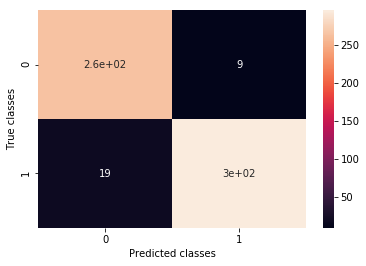

In [86]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.show()